# Machine Learning Lifecycle Example

### 1 Objective

Infer how IQ, Years of Experience, and Age affects INCOME using a linear model.

### 2 Collect Data

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import pandas as pd
from pandas import DataFrame as DF

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#Creating Dataset
np.random.seed(555)
X1 = np.random.normal(100,15,200).astype(int)
X2 = np.random.normal(10,4.5,200)
X3 = np.random.normal(32,4,200).astype(int)
dob = np.datetime64('2017-10-31') - 365*X3

b = 5

er = np.random.normal(0,1.5,200)

Y = np.array ([0.3*x1 + 1.5*x2 + 0.83*x3 + b + e for x1,x2,x3,e in zip(X1,X2,X3,er)])

### 3 Data Cleaning

In [3]:
cols = ['iq','years_experience','dob']
df = DF(list(zip(X1,X2,dob)),columns=cols)
df['income']=Y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
iq                  200 non-null int64
years_experience    200 non-null float64
dob                 200 non-null datetime64[ns]
income              200 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 6.3 KB


In [4]:
df.describe()

,iq,years_experience,income
count,200.000000,200.000000,200.000000
mean,98.895000,9.708405,75.177962
std,14.991253,4.654536,8.889551
min,62.000000,-5.789565,49.467100
25%,88.500000,6.603565,69.391361
50%,99.000000,10.021919,75.180707
75%,108.250000,12.927809,80.739804
max,134.000000,21.889216,98.380710


In [5]:
# Cleaning data by getting rid of negative values in years of experience
df = df[df.years_experience >= 0]
df.describe()

,iq,years_experience,income
count,196.000000,196.000000,196.000000
mean,98.959184,9.963718,75.603845
std,14.769628,4.332578,8.424493
min,62.000000,0.084480,54.325402
25%,88.500000,6.940314,69.619532
50%,99.000000,10.192384,75.327426
75%,108.250000,12.967590,80.798796
max,134.000000,21.889216,98.380710


### 4 EDA (External Data Sources)

In [6]:
df.describe(include = ['datetime64'])

,dob
count,196
unique,22
top,1986-11-08 00:00:00
freq,20
first,1975-11-11 00:00:00
last,1996-11-05 00:00:00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb39bf66d8>,
      dtype=object)

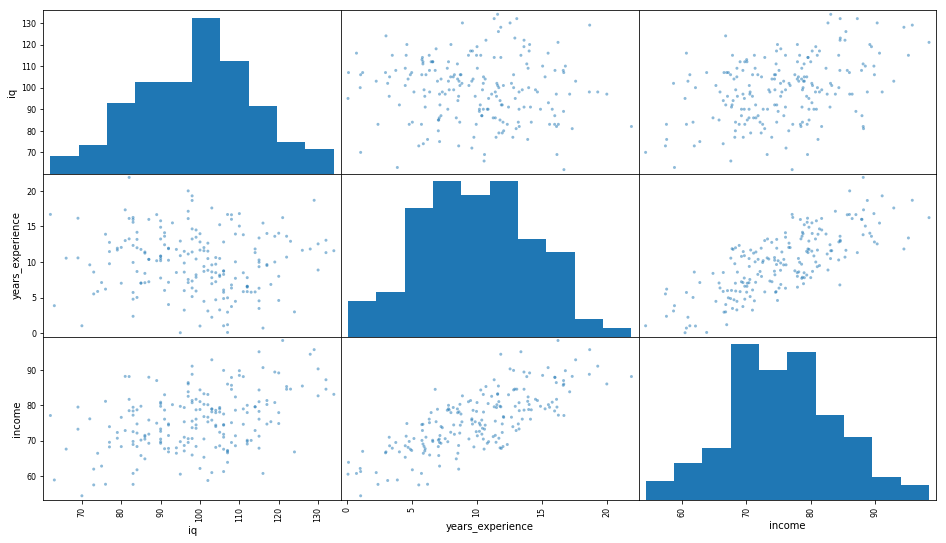

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.scatter_matrix(df,figsize =(16,9))

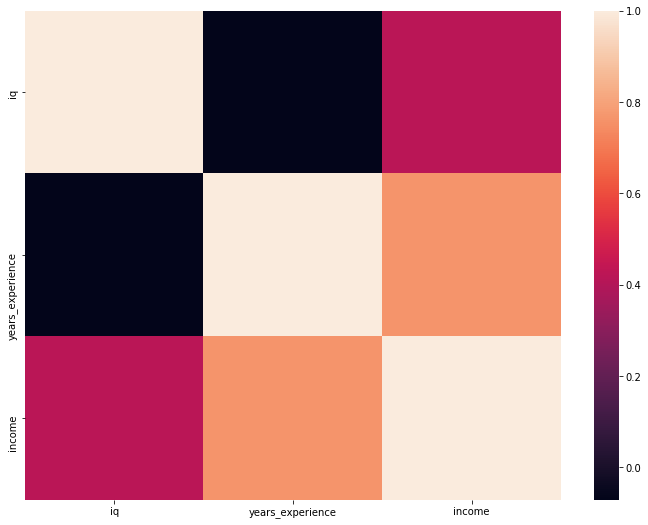

In [8]:
import seaborn as sns
plt.figure (figsize=(12,9))
sns.heatmap(df.corr())

### 5 Data Processing / Feature Engineering

In [9]:
#converting datetime into integer and add it to the analysis
from datetime import datetime as dt
df['age']=df.dob.apply(lambda x:(dt.strptime('2017-10-31','%Y-%m-%d')-x).days/365) #creating time delta to get the days
df.drop('dob',axis = 1,inplace=True)

In [10]:
df.head()

,iq,years_experience,income,age
0,102,3.134666,58.665854,23.0
1,105,15.245371,78.989823,25.0
2,83,2.391084,57.564307,29.0
3,103,9.606721,75.783867,33.0
4,97,11.134619,82.547093,36.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3b6289e8>,
      dtype=object)

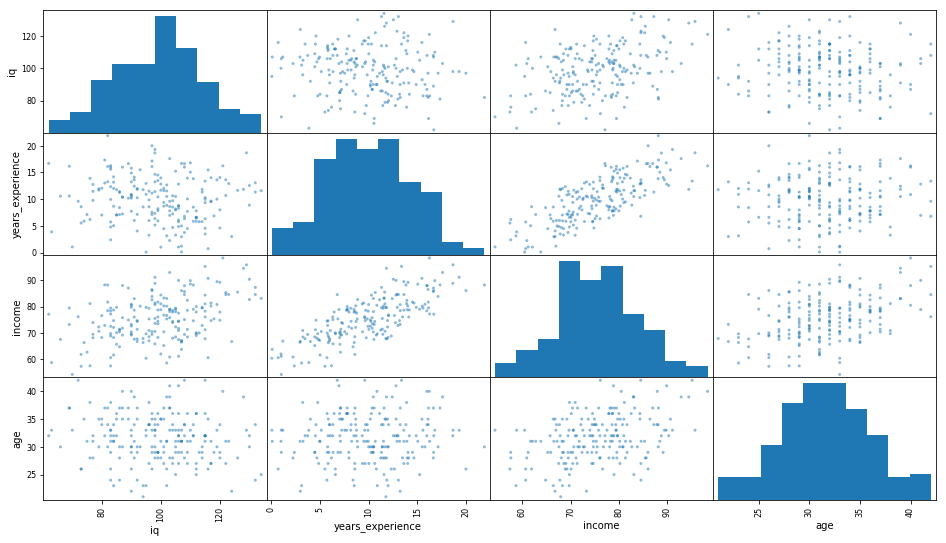

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.scatter_matrix(df,figsize =(16,9))

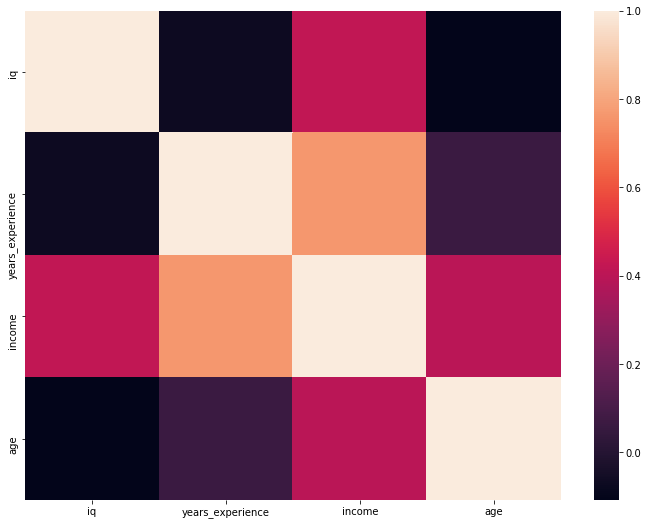

In [12]:
import seaborn as sns
plt.figure (figsize=(12,9))
sns.heatmap(df.corr())

### 6 Train/Evaluate Models

In [13]:
#train/test split
X = df.iloc[:,[0,1,3]]
Y = df.income

tr_idx = X.sample(frac=0.67).index
Xtr = X[X.index.isin(tr_idx)].values
Xts = X[~X.index.isin(tr_idx)].values

Ytr = Y[Y.index.isin(tr_idx)].values
Yts = Y[~Y.index.isin(tr_idx)].values

#### Create Model

In [14]:
tf.reset_default_graph()

In [15]:
sess = tf.Session()

#create parameters
w = tf.get_variable(name = 'w', initializer = [[0.1],[0.1],[0.1]])
b = tf.get_variable(name = 'b', initializer = 0.)

#create input placeholders
x = tf.placeholder ('float32',name='x')
y = tf.placeholder ('float32', name='y_true')

#create linear model
yhat = tf.reshape (tf.matmul(x,w)+b,[-1,],name='yhat')

#### Create the loss and test score functions

In [16]:
mse = tf.reduce_mean(tf.square(y - yhat),name='mse')
rmse = tf.sqrt(mse,name='rmse')

#test score
test_nrmse = tf.divide(rmse,tf.abs(tf.reduce_mean(y)),name ='nrmse')

In [17]:
#init vars
init = tf.variables_initializer([w,b])
sess.run(init)

#### Training/Evaluation

In [20]:
#reset parameters w and b
sess.run(init)

#run optimiaztion again with smaller learning rate
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=opt.minimize(rmse)

for i in range (800):
    if (i%50 ==0)& (i>0):
        nrmse = sess.run(test_nrmse,{x:Xts,y:Yts})
        print('Test NRMSE: {}'.format(nrmse))
    else:
        sess.run(train,{x:Xtr, y:Ytr})

Test NRMSE: 0.10212556272745132
Test NRMSE: 0.08067382872104645
Test NRMSE: 0.06304242461919785
Test NRMSE: 0.07922762632369995
Test NRMSE: 0.07429389655590057
Test NRMSE: 0.0768253430724144
Test NRMSE: 0.07478637248277664
Test NRMSE: 0.07510600239038467
Test NRMSE: 0.07534012943506241
Test NRMSE: 0.0738837793469429
Test NRMSE: 0.0757863000035286
Test NRMSE: 0.07300514727830887
Test NRMSE: 0.0761224702000618
Test NRMSE: 0.07236886769533157
Test NRMSE: 0.07637173682451248


In [21]:
#0.3*x1 + 1.5*x2 + 0.83*x3 + 5
sess.run([w,b])

[array([[0.36643198],
        [1.4265858 ],
        [0.9569105 ]], dtype=float32), 0.02767626]

#### Conclusion: according to the objective that was to infer how (or if) Age, Years of experience and IQ affects INCOME:
We can infer that for every IQ point a person earns 366 USD, for every year of experience a person earns 1426 USD and for every years old (Age) a person earns 950 USD Anually.